# Descriptive Analysis of Sales Data (2019)

This notebook provides a detailed descriptive analysis of sales data for a specific products, covering each month in 2019. The primary objectives of this analysis are to:

- Examine the monthly sales trends throughout the year.
- Identify peak and low sales months.
- Provide insights into potential improvements for future sales strategy.

The data is sourced from internal sales records, and it will be analyzed through various statistical and visualization techniques.

---


In [1]:
# importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the file and showing sample data
df=pd.read_csv('total_data.csv')
df.head()

,Order ID,Product Category,Product,Quantity Ordered,Price Each,Total,Order Date,City,State,Purchase Address
0,176558,Accessories,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,Dallas,TX,"917 1st St, Dallas, TX 75001"
1,176559,Headphones,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,Boston,MA,"682 Chestnut St, Boston, MA 02215"
2,176560,Mobiles,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,Los Angeles,CA,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Headphones,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,Los Angeles,CA,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Headphones,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,Los Angeles,CA,"333 8th St, Los Angeles, CA 90001"


In [3]:
# checking for duplicates
df.duplicated().sum()

0

In [4]:
# checking for nulls
df.isnull().sum()

Order ID            0
Product Category    0
Product             0
Quantity Ordered    0
Price Each          0
Total               0
Order Date          0
City                0
State               0
Purchase Address    0
dtype: int64

In [5]:
# checking each column datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  int64  
 1   Product Category  185686 non-null  object 
 2   Product           185686 non-null  object 
 3   Quantity Ordered  185686 non-null  int64  
 4   Price Each        185686 non-null  float64
 5   Total             185686 non-null  float64
 6   Order Date        185686 non-null  object 
 7   City              185686 non-null  object 
 8   State             185686 non-null  object 
 9   Purchase Address  185686 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 14.2+ MB


In [6]:
# converting the columns to it's suitable datatype for analysis
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Order ID']=df['Order ID'].astype('object')

In [7]:
# removing duplicates and nulls
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [8]:
# checking again the datatypes after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product Category  185686 non-null  object        
 2   Product           185686 non-null  object        
 3   Quantity Ordered  185686 non-null  int64         
 4   Price Each        185686 non-null  float64       
 5   Total             185686 non-null  float64       
 6   Order Date        185686 non-null  datetime64[ns]
 7   City              185686 non-null  object        
 8   State             185686 non-null  object        
 9   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 14.2+ MB


In [ ]:
df=df.to_csv('Total_Data.csv',index=False)

# Price List

In [21]:
print("""These are the prices for the whole products sorted from lowest to highest
""")
df[['Product','Price Each']].drop_duplicates().sort_values('Price Each',ascending=True)

These are the prices for the whole products sorted from lowest to highest



,Product,Price Each
19,AAA Batteries (4-pack),2.99
13,AA Batteries (4-pack),3.84
0,USB-C Charging Cable,11.95
3,Wired Headphones,11.99
11,Lightning Charging Cable,14.95
1,Bose SoundSport Headphones,99.99
34,20in Monitor,109.99
33,27in FHD Monitor,149.99
15,Apple Airpods Headphones,150.00
28,Flatscreen TV,300.00


## Product Analysis Overview

In this section, we will analyze the following key metrics for each product:

- **Total Sales for Each Product**: The total revenue generated by each product throughout the year.
- **Total Quantity Ordered for Each Product**: The total number of units ordered for each product.
- **Average Price for Each Product Category**: The average selling price of products within each category.

This analysis will provide insights into product performance and pricing trends across categories.


In [24]:
# total sales for each product
print("""
Below are the total sales for each product
""")
df.groupby('Product')['Total'].sum().sort_values(ascending=True)


Below are the total sales for each product



Product
AAA Batteries (4-pack)          92740.83
AA Batteries (4-pack)          106118.40
Wired Headphones               246478.43
USB-C Charging Cable           286501.25
Lightning Charging Cable       347094.15
LG Dryer                       387600.00
LG Washing Machine             399600.00
20in Monitor                   454148.71
Vareebadd Phone                827200.00
27in FHD Monitor              1132424.50
Bose SoundSport Headphones    1345565.43
Flatscreen TV                 1445700.00
Apple Airpods Headphones      2349150.00
34in Ultrawide Monitor        2355558.01
27in 4K Gaming Monitor        2435097.56
Google Phone                  3319200.00
ThinkPad Laptop               4129958.70
iPhone                        4794300.00
Macbook Pro Laptop            8037600.00
Name: Total, dtype: float64

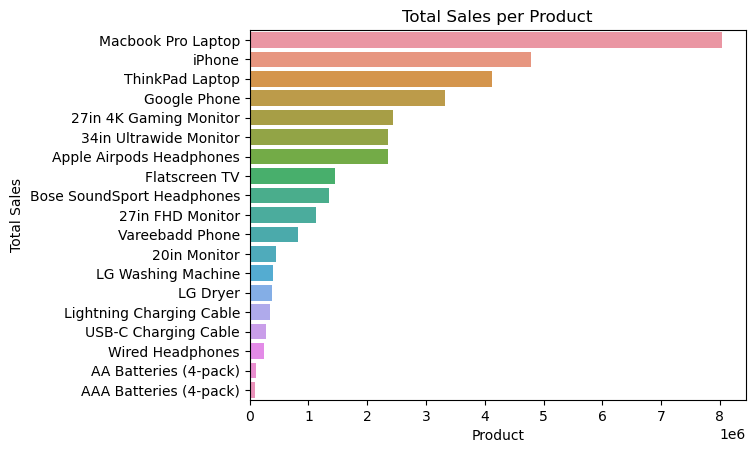

In [36]:
# Group the data by product and calculate total sales
df_grouped = df.groupby('Product')['Total'].sum().sort_values(ascending=False)

# Create a bar plot using Seaborn
sns.barplot(y=df_grouped.index, x=df_grouped.values,orient='h')

# Customize the plot
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Total Sales per Product')
plt.xticks()

# Show the plot
plt.show()

In [27]:
# total quantity ordered for each product
df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=True)

Product
LG Dryer                        646
LG Washing Machine              666
Vareebadd Phone                2068
20in Monitor                   4129
ThinkPad Laptop                4130
Macbook Pro Laptop             4728
Flatscreen TV                  4819
Google Phone                   5532
34in Ultrawide Monitor         6199
27in 4K Gaming Monitor         6244
iPhone                         6849
27in FHD Monitor               7550
Bose SoundSport Headphones    13457
Apple Airpods Headphones      15661
Wired Headphones              20557
Lightning Charging Cable      23217
USB-C Charging Cable          23975
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Name: Quantity Ordered, dtype: int64

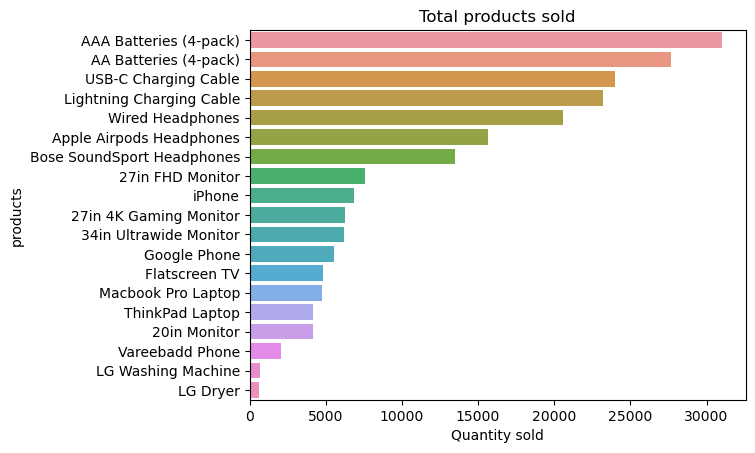

In [41]:
# Group the data by product and calculate total sales
df_grouped2 = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

# Create a bar plot using Seaborn
sns.barplot(y=df_grouped2.index, x=df_grouped2.values,orient='h')

# Customize the plot
plt.xlabel('Quantity sold')
plt.ylabel('products')
plt.title('Total products sold')

# Show the plot
plt.show()

## Order Analysis

In this section, we will analyze the orders in the dataset with a focus on:

- **Number of Orders Placed for Each Product Category**: A breakdown of how many orders were placed for each category.
- **Most Common Product Sold**: Identifying the product with the highest sales frequency.

This will help us understand the distribution of orders across categories and highlight the most popular product.


In [46]:
# how many orders placed for each product category 
df.groupby('Product Category')['Quantity Ordered'].sum().sort_values(ascending=True)

Product Category
Home Appliances      6131
Laptops              8858
Mobiles             14449
Monitors            24122
Headphones          49675
Accessories        105844
Name: Quantity Ordered, dtype: int64

In [47]:
# the most common product sold
df['Product'].mode()[0]

'USB-C Charging Cable'

## Sales Analysis

In this section, we will explore the sales performance across different regions by analyzing:

- **Total Sales Amount for Each City**: The overall revenue generated in each city.
- **Total Sales for Each State**: A summary of total sales figures for each state.

This analysis will provide insights into the geographical distribution of sales and identify key markets.


In [49]:
# total sales amount for each city 
df.groupby('City')['Total'].sum().sort_values(ascending=False)

City
San Francisco    8262203.91
Los Angeles      5452570.80
New York City    4664317.43
Boston           3661642.01
Atlanta          2795498.58
Dallas           2767975.40
Seattle          2747755.48
Portland         2320490.61
Austin           1819581.75
Name: Total, dtype: float64

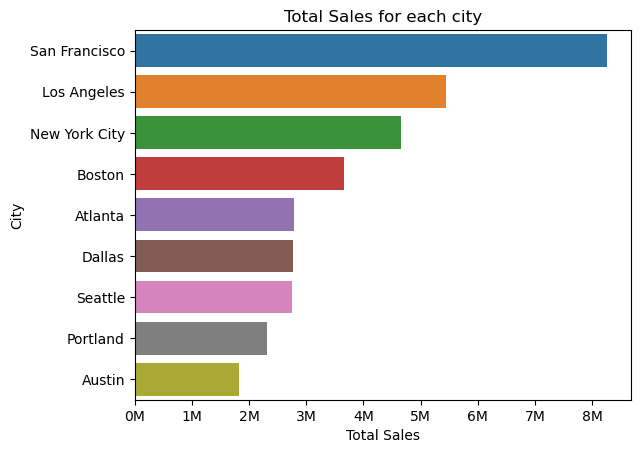

In [60]:
# Group the data by product and calculate total sales
from matplotlib.ticker import FuncFormatter
def million_formatter(x, pos):
    return f"{x / 1e6:.0f}M"  


plt.gca().xaxis.set_major_formatter(FuncFormatter(million_formatter))

df_grouped3 = df.groupby('City')['Total'].sum().sort_values(ascending=False)

sns.barplot(y=df_grouped3.index, x=df_grouped3.values,orient='h')

plt.xlabel('Total Sales')
plt.ylabel('City')
plt.title('Total Sales for each city')

plt.show()

In [59]:
# total sales for each state
df.groupby('State')['Total'].sum().sort_values(ascending=False)

State
CA    13714774.71
NY     4664317.43
TX     4587557.15
MA     3661642.01
GA     2795498.58
WA     2747755.48
OR     1870732.34
ME      449758.27
Name: Total, dtype: float64

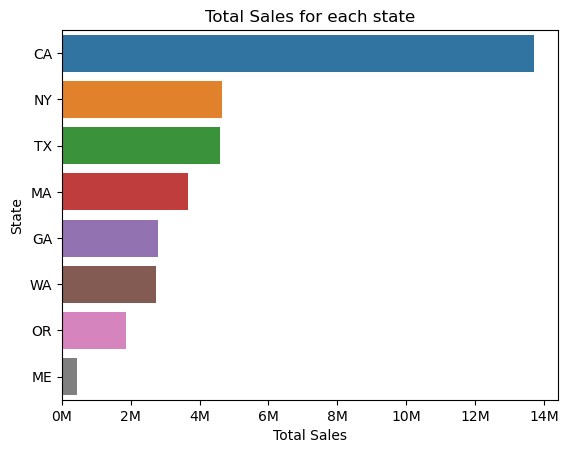

In [65]:
def million_formatter2(x, pos):
    return f"{x / 1e6:.0f}M"  


plt.gca().xaxis.set_major_formatter(FuncFormatter(million_formatter2))

df_grouped4 = df.groupby('State')['Total'].sum().sort_values(ascending=False)

sns.barplot(y=df_grouped4.index, x=df_grouped4.values)

plt.xlabel('Total Sales')
plt.ylabel('State')
plt.title('Total Sales for each state')

plt.show()

## Time-Based Analysis

In this section, we will analyze the data from a time perspective, focusing on:

- **Number of Orders Placed in Each Month**: Tracking the total number of orders throughout the year.
- **Number of Orders Placed per Month for Each Product**: Analyzing the monthly order frequency for each product.
- **Total Sales Amount for Each Month**: Evaluating the total revenue generated in each month.

This time-based analysis will help us identify trends and patterns in sales and order behavior over the course of the year.


In [69]:
# how many orders were placed in each month 
print("""
Months are from Jan till Dec.
Those are the number of orders placed for each month:
""")
df.groupby(df['Order Date'].dt.month)['Order ID'].nunique().sort_values(ascending=True)


Months are from Jan till Dec.
Those are the number of orders placed for each month:



Order Date
1      9293
9     11202
8     11484
2     11496
6     12989
7     13761
3     14549
5     15836
11    16859
4     17528
10    19436
12    24004
Name: Order ID, dtype: int64

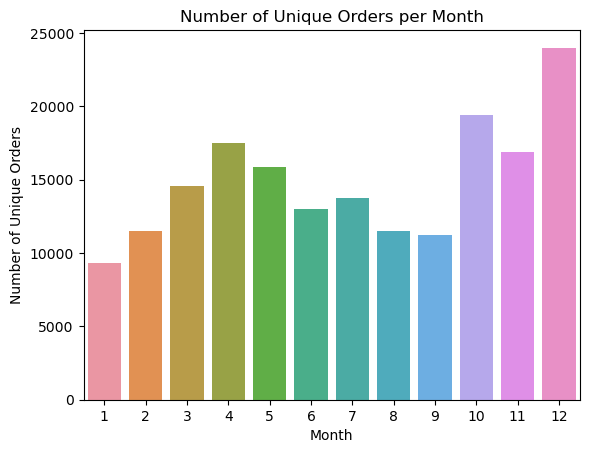

In [71]:

# Group the data by month and count unique order IDs
df_grouped5 = df.groupby(df['Order Date'].dt.month)['Order ID'].nunique().sort_values(ascending=True)

# Create a bar plot using Seaborn
sns.barplot(x=df_grouped5.index, y=df_grouped5.values)

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Number of Unique Orders')
plt.title('Number of Unique Orders per Month')

# Show the plot
plt.show()

In [72]:
print("""
Number of orders placed per month(presented in a pivot table)
""")
df['Order Date'].dt.month
pivot_table=pd.pivot_table(data=df,columns=df['Order Date'].dt.month,index='Product',values='Order ID',aggfunc='nunique')
pivot_table['Total']=pivot_table.sum(axis=1)
pivot_table.loc['Total']=pivot_table.sum(axis=0)
pivot_table


Number of orders placed per month(presented in a pivot table)



Order Date,1,2,3,4,5,6,7,8,9,10,11,12,Total
Product,,,,,,,,,,,,,
20in Monitor,215,245,323,387,338,321,324,258,274,427,419,567,4098
27in 4K Gaming Monitor,313,424,478,564,541,451,483,437,380,718,575,861,6225
27in FHD Monitor,421,471,605,733,688,561,601,484,478,788,709,959,7498
34in Ultrawide Monitor,313,415,520,650,543,454,460,378,377,670,549,845,6174
AA Batteries (4-pack),1037,1274,1671,2060,1820,1540,1555,1353,1314,2237,1969,2712,20542
AAA Batteries (4-pack),1084,1318,1644,1987,1884,1450,1553,1339,1281,2233,1997,2823,20593
Apple Airpods Headphones,812,1009,1308,1507,1354,1152,1212,998,961,1660,1501,2051,15525
Bose SoundSport Headphones,659,829,1181,1277,1165,969,1048,871,824,1437,1235,1803,13298
Flatscreen TV,244,312,358,458,399,366,396,331,291,522,456,661,4794


In [73]:
# what is the total sales amount for each month 
df.groupby(df['Order Date'].dt.month)['Total'].sum()

Order Date
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total, dtype: float64

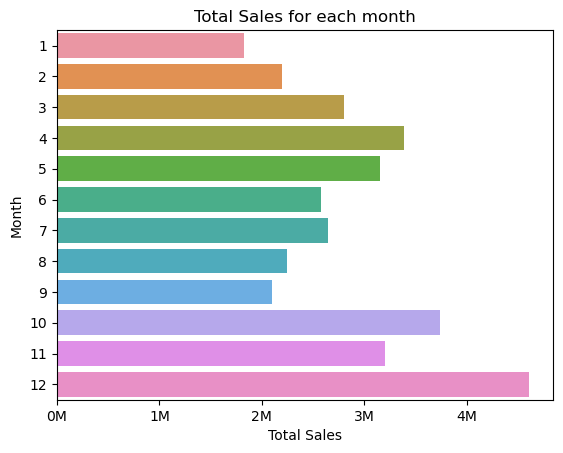

In [75]:
def million_formatter3(x, pos):
    return f"{x / 1e6:.0f}M"  


plt.gca().xaxis.set_major_formatter(FuncFormatter(million_formatter3))

df_grouped6 = df.groupby(df['Order Date'].dt.month)['Total'].sum().sort_values(ascending=False)

sns.barplot(y=df_grouped6.index, x=df_grouped6.values,orient='h')

plt.xlabel('Total Sales')
plt.ylabel('Month')
plt.title('Total Sales for each month')

plt.show()